In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/content/drive/MyDrive/ML CSV/cancer.csv')
data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1, inplace=True) # Removing the data columns which need to drop as per assignment.

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import plotly.express as px
class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples

    def fit(self, X):
        self.labels_ = [-1] * len(X)  # Initialize all points as noise (-1)
        self.cluster_id = 0

        for i, x in enumerate(X):
            if self.labels_[i] != -1:
                continue  # Already assigned to a cluster

            neighbors = self.region_query(X, x)
            if len(neighbors) < self.min_samples:
                self.labels_[i] = -1  # Assign to noise
            else:
                self.cluster_id += 1
                self.expand_cluster(X, x, neighbors, self.cluster_id)

        return self.labels_

    def region_query(self, X, x):
        neighbors = []
        for i, p in enumerate(X):
            if self.distance(x, p) < self.eps:
                neighbors.append(i)
        return neighbors

    def expand_cluster(self, X, x, neighbors, cluster_id):
        self.labels_[x] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor = neighbors[i]
            if self.labels_[neighbor] == -1:
                self.labels_[neighbor] = cluster_id
                new_neighbors = self.region_query(X, X[neighbor])
                if len(new_neighbors) >= self.min_samples:
                    neighbors.extend(new_neighbors)
            i += 1

    def distance(self, a, b):
        return sum((a_i - b_i) ** 2 for a_i, b_i in zip(a, b)) ** 0.5

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

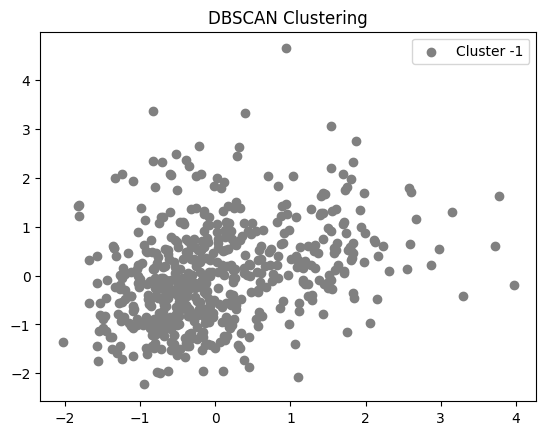

In [7]:
dbscan = DBSCAN(eps=0.2, min_samples=6)
labels = dbscan.fit(scaled_data)

data['cluster_label'] = labels
import matplotlib.pyplot as plt

unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'gray'  # Noise points in gray
    cluster = scaled_data[labels == label]
    plt.scatter(cluster[:, 0], cluster[:, 1], color=color, label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

In [8]:
# Count the number of points in each cluster
cluster_counts = data['cluster_label'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
-1    569
Name: cluster_label, dtype: int64


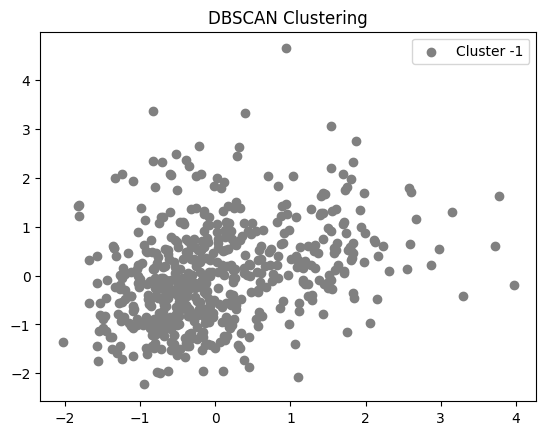

In [9]:
dbscan = DBSCAN(eps=0.5, min_samples=6)
labels = dbscan.fit(scaled_data)

data['cluster_label'] = labels
import matplotlib.pyplot as plt

unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'gray'
    cluster = scaled_data[labels == label]
    plt.scatter(cluster[:, 0], cluster[:, 1], color=color, label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

In [10]:
cluster_counts = data['cluster_label'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
-1    569
Name: cluster_label, dtype: int64


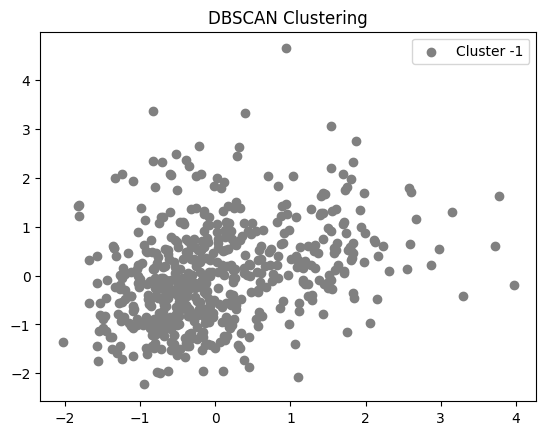

In [11]:
dbscan = DBSCAN(eps=0.2, min_samples=3)
labels = dbscan.fit(scaled_data)

data['cluster_label'] = labels
import matplotlib.pyplot as plt

unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'gray'
    cluster = scaled_data[labels == label]
    plt.scatter(cluster[:, 0], cluster[:, 1], color=color, label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

In [12]:
cluster_counts = data['cluster_label'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
-1    569
Name: cluster_label, dtype: int64
